# **Finding Lane Lines on the Road** 

## Writeup Template

### You can use this file as a template for your writeup if you want to submit it as a markdown file. But feel free to use some other method and submit a pdf if you prefer.

---

**Finding Lane Lines on the Road**

The goals / steps of this project are the following:
* Make a pipeline that finds lane lines on the road
* Reflect on your work in a written report


[\\]: # (Image References)

![grayscale.jpg](attachment:grayscale.jpg) "Grayscale"

---

### Reflection

### 1. Describe your pipeline. As part of the description, explain how you modified the draw_lines() function.

My pipeline consisted of 7 stages:
1) grayscale conversion
2) gaussian blur and smoothing to reduce nosie for shaper edges
3) canny transform to edge image
4) define region of interested to reduce unrelated areas
5) hough lines to generate lines around edges
6) filtering unusable lines and finding an average to form a single line
7) overlay the thickened line over the original image

Each stages are separately coded for easier debug process during development.

First, I defined a list of parameters that I needed at the beginnig of coding the pipeline for easier managing and updating parameters as I proceeded.

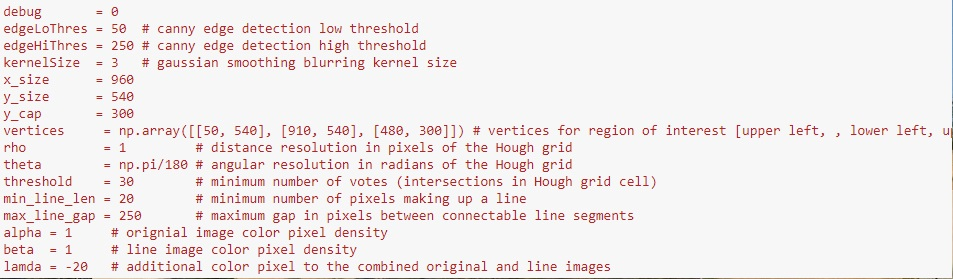

I converted the images to grayscale to help Canny transform later. Next, I applied gaussian blur and smoothing algorithm to reduce the noise so we could create better edges later on. Then we used Canny transform to turn an image to its gradient to show a wide range of edges in the image. By tuning the low and high thresholds of Canny transform algorithm between 50 and 250, I found it best to filter out the noise from small objects on the road.

Knowing that the road and its lanes were what we interested, I plotted out the coordinance focusing on the road as a shape of trapezoid. I chosed 50% of y axis to be the top of the trapezoid, and 100% of y axis to be the bottom, which the left and right most of trapezoid to be 10% from left and right sides of the image. Top top of the trapezoid extends 10 pixels from 50% of x axis to both sides. 

After masking the edge images with the region of interest, I applied Hough transaform to generate all the lines associated with the edges of the lanes. From the collection of lines, there were few lines that ran across the image from left bottom to right middle. These were not lines that represented the lane lines. I needed to add conditions based on their slops to filter out any lines that were near to horizontal, i.e. absolute values of slopes that are less than 0.5. This allowed me to focus on the lines that matter. I separated the left and the right trending lines by using positve (right lane) vs negative (left lane) slopes. By resolving the simple slope equation, m=(y2-y1)/(x2-x1)=(y2-y')/(x2-x'), I could easily apply the y' as constains, (y_cap as top of trapezoid and y_size as bottom of trapezoid), to find out x' value where the left and right lines intercepts the y_cap and y_size. This allowed me to extrapolute the lines to cover the lanes. 

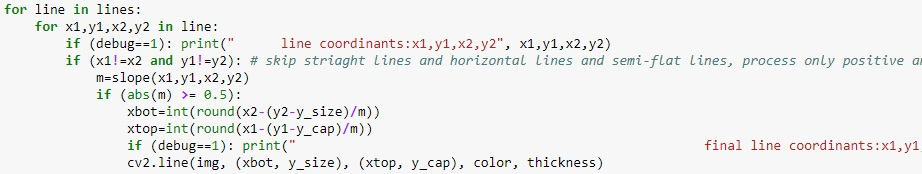

The last pizzle was to overlay the newly drawed lines to the original image with a thickness defined.

At the beginning, all provided images and videos worked fine with the pipeline above. Lines were following both left and right, yellow and white lanes. One problem was, there were multiple lines instead of a single line. Plus the pipeline only worked for the first two videos but not the challenged video. Something must be fixed to get that right. I will talk about these problems that I found in the next section.

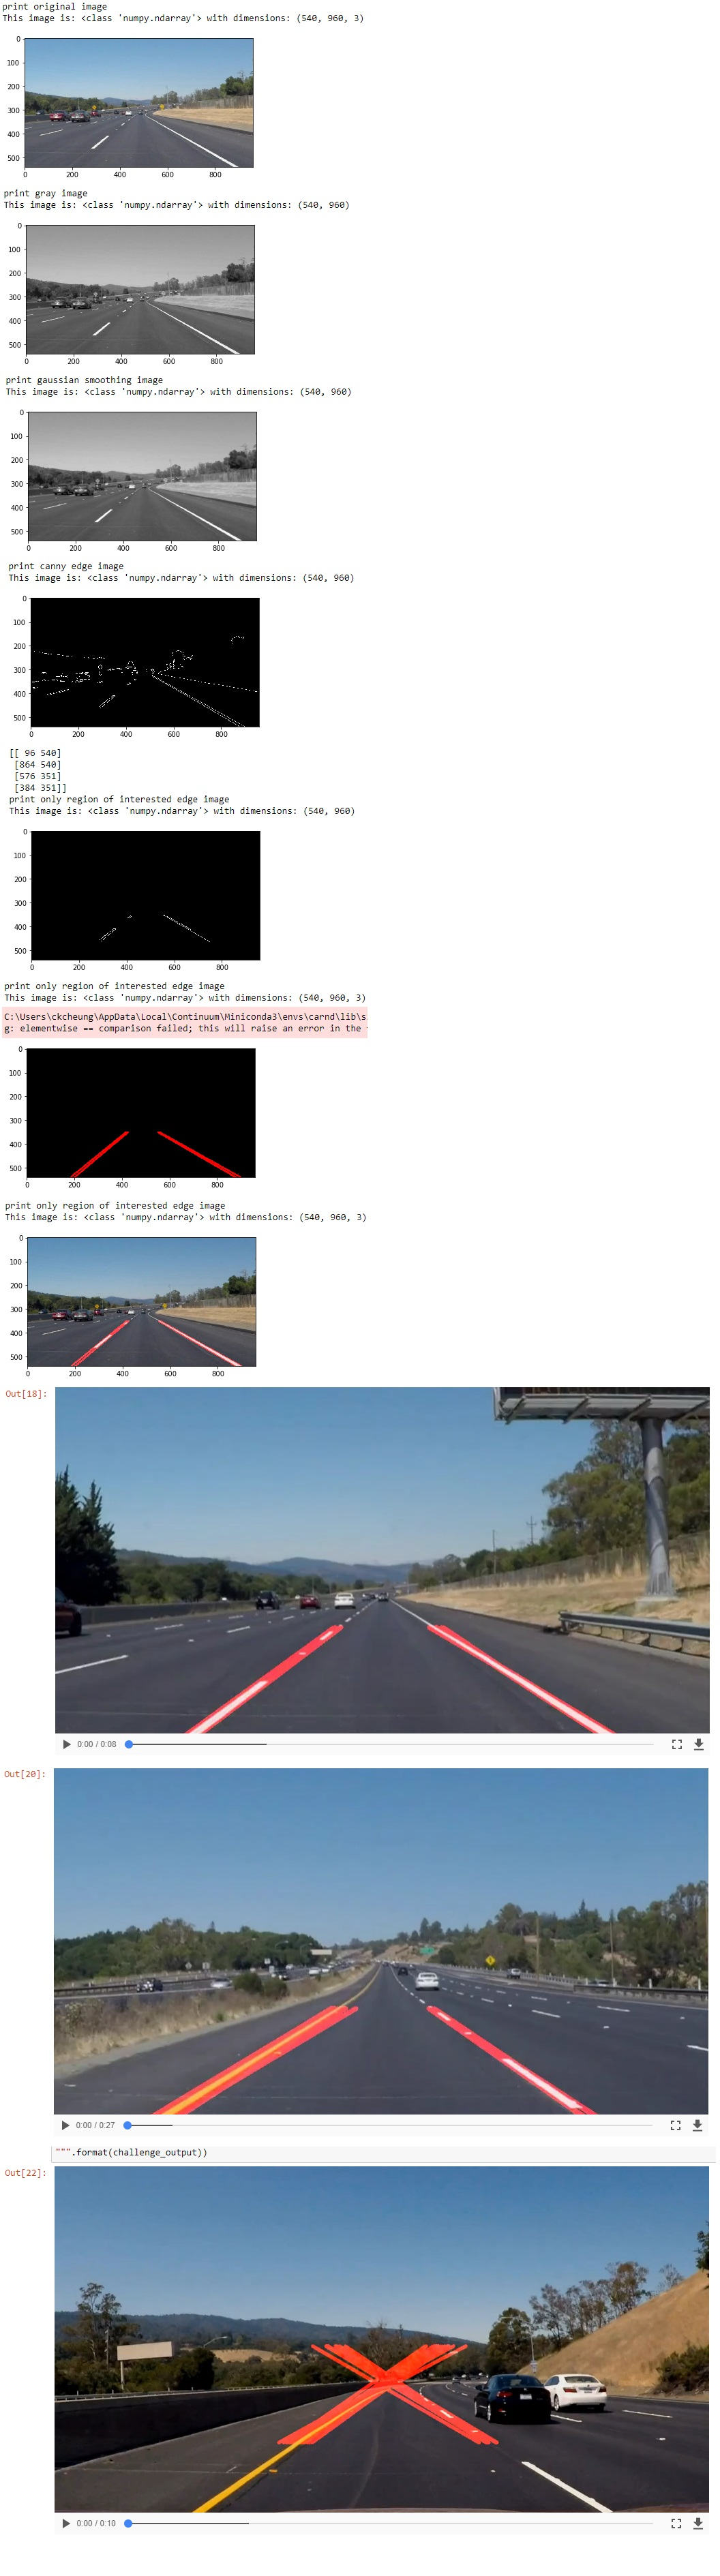


### 2. Identify potential shortcomings with your current pipeline

Here let me talk about the problem I had before talking about potential shortcommings.

The current pipeline drawed multiples lines generated by Hough line transform instead of a single line. To do so, I needed to modify my filtering to include averaging the top and bottom coordinances of each lines on each lane. At the beginning, I thought averging the slope of the each line and their interception would do the trick, but turned out I was wrong on the math. I then realized each lines top and bottom coordinances were very close to each other, and simply averaging the each top and bottom coordinances would allow me to get a single line that was very close to represent each lane. 

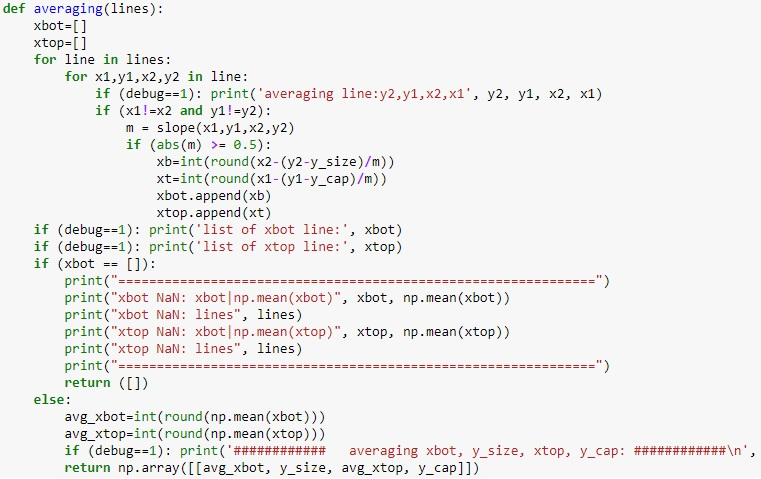

With this minor fix, I was able to get an averaged line out of all lines generated for each lane.

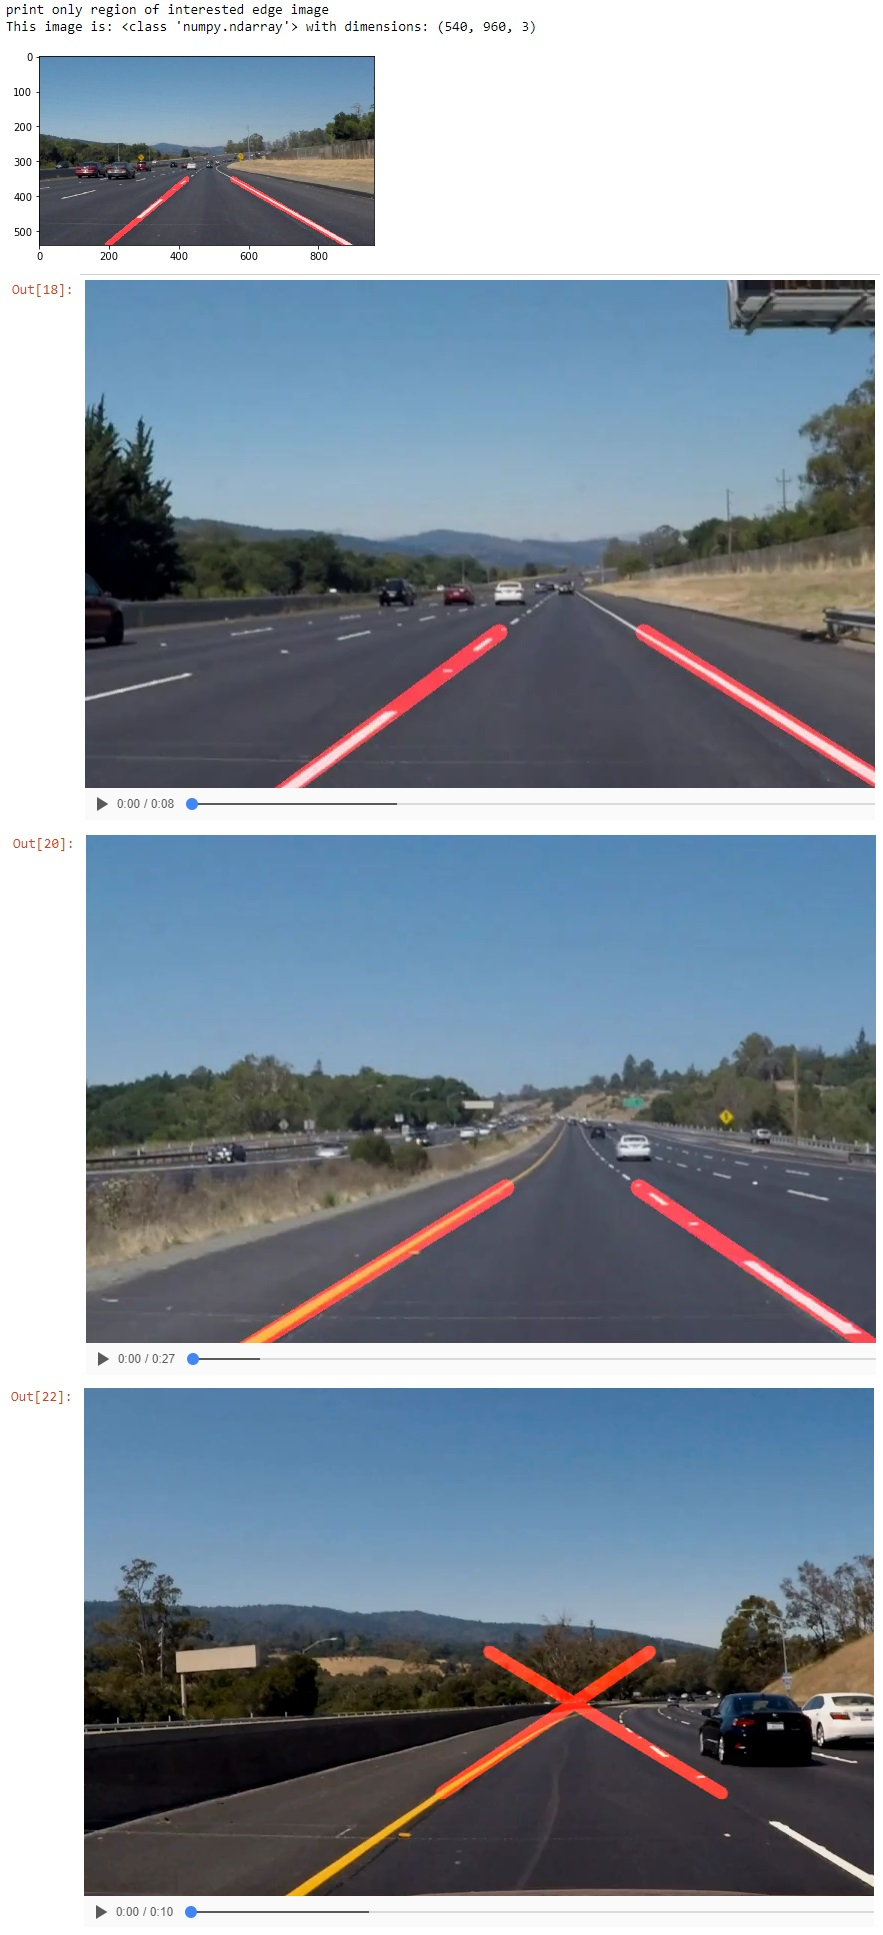

However, the lines were still off from the bottom where the lane lines in the challenge video. As I ran the video with debug message on, I notice that the pixel of the image was larger than the images provided to test the pipeline. This is one potential shortcoming would happen or already happened when different sizes of video images are fed to the pipeline. This means my pipeline needs to be capability to support different pixel size. As a result, I updated my vertice, y_size, x_size, and corresponding parameters related to pixel size to variables based on image.shape[0] and image.shape[1]. To be able to udpate the image size in process_image(), I added globel variable declaration to make sure global varialbles were updated accordingly for functions using process_image and feeding their own images of different pixel size.

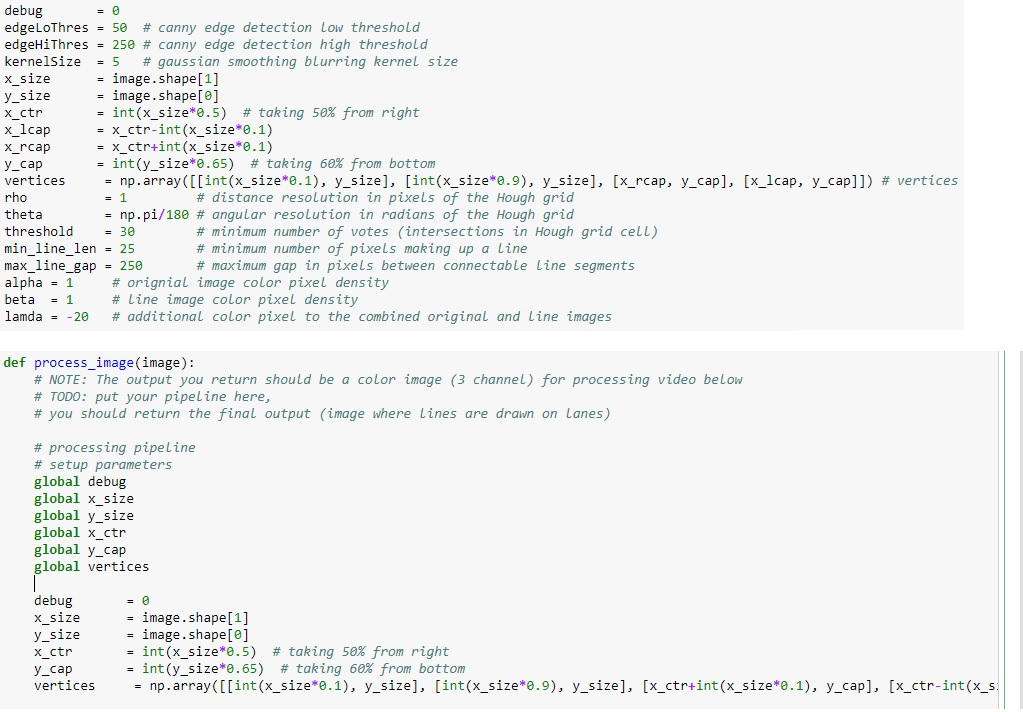
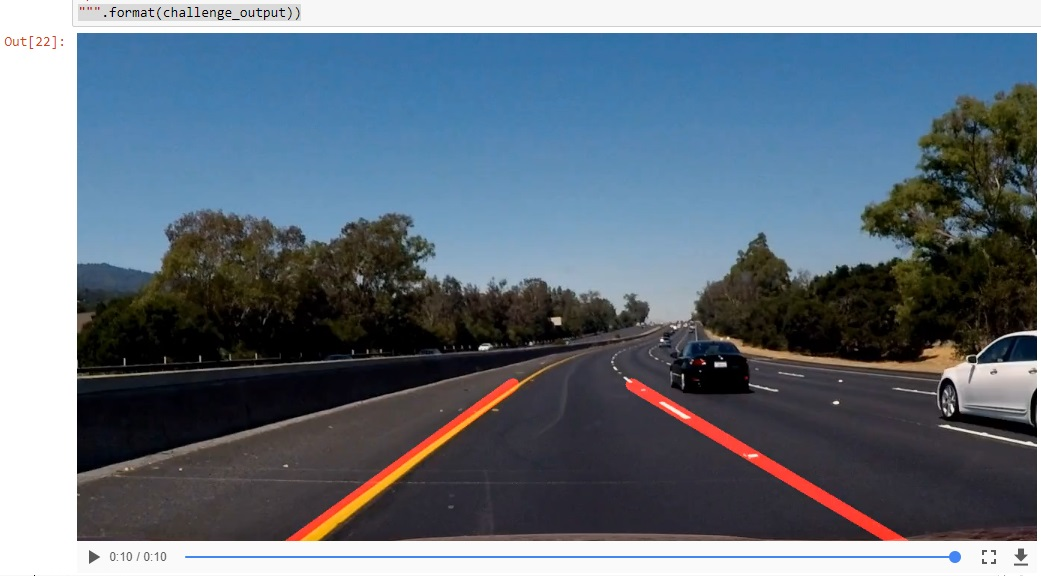

Another shortcoming was the fade left yellow lane on the white cement road in the challenge video. When the color of the lanes becoming too close to it background color Canny edge detection will not be able to identify a clear edge between lane and road.

Also, another shortcoming is the Hough lines transform may not be able to generate lanes since the the image fed to the pipeline is based on a moving frame of a video. If it happens to land on a wide gap between the next lane line could be detected, there may not be any lines gerneated and the pipeline will need to be able to skip that process instead of erroring out for null objects from the lines array. 


### 3. Suggest possible improvements to your pipeline

A possible improvement to overcome the shortcoming about the fade lane line is to used HSV scale instead of gray scale. HSV color space was able to extract the faded yellow lane from the similar cement road. With that, Canny edge detection algorithm will be able to generate the edges for the yellow lane.  

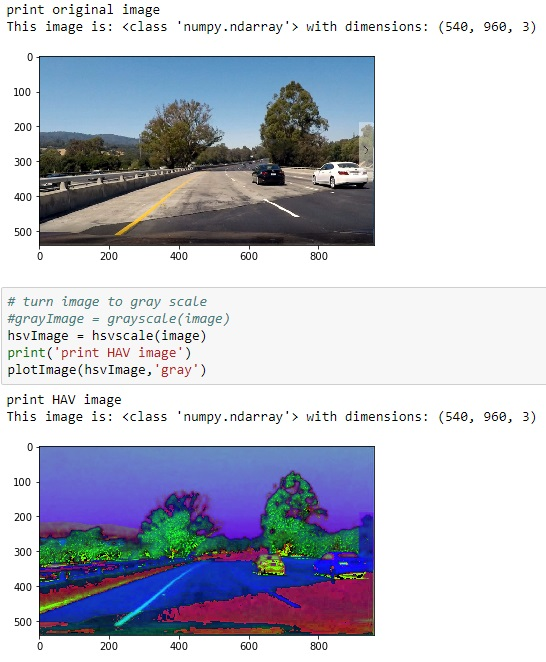

Another possible improvement to overcome the shortcoming about empyt line array is to add condition checking to make sure the pipeline will skip the empty line array and be able to continue processing the remaining video feed. (see averging image above for empty line array handling)


### 4. Conclusion

Overall the project is fun to work on and learning the trick to prefect the lane finding process is usefully to apply to future project. The product of the land finding pipeline still have room to improve, such as better filtering algorithm or fine turning the parameters for Canny transform and Hough Line detection. 
